## Assignment 5: Clustering
Tyler Bevan

In this assignment, you will apply clustering to several tasks. 

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

* download the `GoogleNews-vectors-negative300.bin` file from https://github.com/mmihaltz/word2vec-GoogleNews-vectors (or just copy if from the earlier assignment) and unzip the file
* load the file by running the cell below (you may need to pip install gensim and you may need to change the path to the file)

#### Run the following cell, the continue to Parts 1, 2, & 3

In [2]:
from gensim.models import KeyedVectors as w
w2v = w.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

C:\Users\tbevan\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
vocab = ['red', 'blue', 'green', 'dog', 'cat', 'cow', 'planet', 'sun', 'king', 'queen', 'prince', 'princess']

### Part 1: K-means

* Cluster the w2v vectors for the words in `vocab`. Use `n_clusters=4`. 
* Answer the following questions in a markdown cell:
 * Which words cluster together? 
 * Why do you think those words cluster together?
 * Are there any clusters / word groups that surprise you?

In [4]:
vectors = [w2v[x] for x in vocab]

km = KMeans(n_clusters=4)
km.fit(vectors)
result = zip(vocab, km.labels_)
for row in result:
    print('{} in group {}'.format(row[0], row[1]))

red in group 2
blue in group 2
green in group 2
dog in group 0
cat in group 0
cow in group 0
planet in group 3
sun in group 3
king in group 1
queen in group 1
prince in group 1
princess in group 1


Group 0:
 - king
 - queen
 - prince
 - princess

Group 1:
 - planet
 - sun

Group 2:
 - red
 - blue
 - green

Group 3:
 - dog
 - cat
 - cow
 
These words make sense to cluster together, as they have related meanings/contexts. (royalty, astronomy, colors, animals)
No surprises in this case, that is how I would have grouped them.

### Part 2: Hierarcical 


* Obtain the w2v vectors for the words in the vocab list above.
* Using the scipy `linkage` class, learn a heirarchical model. 
* Generate a dendrogram (see examples linked from the clustering lecture Trello card) using the learned model.
* Answer the following questions in a markdown cell:
 * What are some clusters that you see? 
 * Do some word types emerge from these clusters?
 * What are some clusters / word groupings that surprise you? Why do you think w2v grouped them that way?
* Add the word 'star' to the vocabulary and re-run the clustering. What changed? Why do you think those clusters were generated?

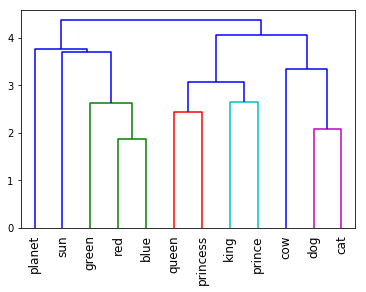

In [5]:
mergings = linkage(vectors, method='complete')
dendrogram(mergings, labels=vocab, leaf_rotation=90)
plt.show()

Queen and princess are grouped, as well as king and prince. That makes sense, as those are gender groups in addition to being royalty. As for why the colors are grouped at the same depth as sun, and below planet is unknown. Perhaps because these are all non-living, also colors can be used to describe the planet and the sun.

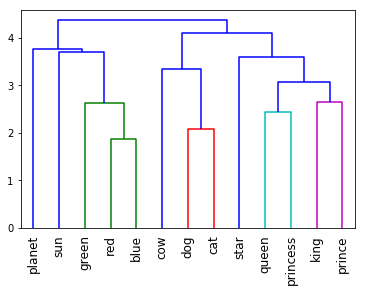

In [6]:
vocab = ['red', 'blue', 'green', 'dog', 'cat', 'cow', 'planet', 'sun', 'king', 'queen', 'prince', 'princess', 'star']
vectors = [w2v[x] for x in vocab]
mergings = linkage(vectors, method='complete')
dendrogram(mergings, labels=vocab, leaf_rotation=90)
plt.show()

Star was grouped with the royalty. That could make sense, as those words are all used to describe people and Google's data set contains a lot of natural language sources. Star is probably used more as an adjective than as a noun in their source data.

### Part 3: Spectral

* Perform spectral clustering on the following image:

![title](nuclei.png)

* You may need to pre-process the image
* You will need to decide the number of clusters that seem appropriate
* Answer the following questions in a markdown cell:
 * How many clusters did you use? Why?

C:\Users\tbevan\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


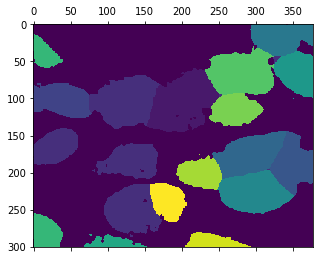

In [18]:
import cv2
import numpy as np
from sklearn.feature_extraction import image
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

image_color = cv2.imread("nuclei.png")
image_gray = np.array(list(map(lambda x: (255-x)/255, cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY).flatten()))).reshape(image_color.shape[:2])
image = []
for x in range(image_color.shape[0]):
    for y in range(image_color.shape[1]):
        if image_gray[x][y] > .4:
            image.append([x, y, image_gray[x][y]])
image = np.array(image)
sc = SpectralClustering(n_clusters=15, affinity='nearest_neighbors')
labels = sc.fit(image)
result = np.zeros(image_color.shape[:2])
for i in range(len(image)):
    result[int(image[i][0])][int(image[i][1])] = labels.labels_[i]+1
plt.matshow(result)

I chose to use 15 groups, which is about how many distinct cells I could see. It worked ok, but the couple of cells that had color varience in them caused the nearest-neighbors graph to split it into multiple groups. I also chose to drop all the background pixels so that only the cells will be considered in the grouping. There is probably better preprocessing I could do to fix the anomolies, but for now I just converted the RGB to a floating point greyscale and that worked ok.

### Part 4: Open Ended

* For this part, you will need to find some data, load it into the notebook, and perform clustering. 
* You cannot just use w2v with a different set of vocabulary
* You cannot just use spectral clustering with a different image
* You cannot use a scikit, nltk, or other pre-loaded data set. You need to find and load your own. 
* I know about all of the online resources and examples for clustering. Don't just copy something you found on some website.
* You can use one of the algorithms in Parts 1, 2, or 3 if they seem appropriate, but you can also try [other ones](http://scikit-learn.org/stable/modules/clustering.html).
* Answer the following questions in a markdown cell:
 * What data did you choose why?
 * What question are you trying to answer with this data?
 * How does your clustering approach help answer that question?
 * What are some things that surprised you about the results?

In [19]:
from nltk.corpus import wordnet as wn
from sklearn.cluster import SpectralClustering


my_words = ['friend', 'ally', 'enemy', 'nemesis', 'arm', 'leg', 'foot', 'hamburger', 'sandwich', 'salad', 'cheese']
edges = []
for word in my_words:
    vect = []
    for other_word in my_words:
        score = wn.wup_similarity(wn.synset(word + '.n.1'), wn.synset(other_word + '.n.1'))
        if score is None or word == other_word:
            vect.append(0)
        else:
            vect.append(score)
    edges.append(vect)

sc = SpectralClustering(n_clusters=4, affinity='precomputed')
labels = sc.fit(edges)
for row in zip(my_words, labels.labels_):
    print('{} : {}'.format(row[0], row[1]))

friend : 0
ally : 2
enemy : 2
nemesis : 0
arm : 3
leg : 3
foot : 3
hamburger : 1
sandwich : 1
salad : 1
cheese : 1


I used different random words that could be grouped based on meaning. I wanted to see if I could use the wordnet similarity scores to create an affinity graph that the spectralclustering module could use to create clusters. I thought I could create a directed affinity graph by creating a vector of all the scores relative to all other words. This worked fairly well, but had some odd effects. I expected friend and ally to be grouped and enemy and nemesis to be grouped, but the wordnet considers friend and nemesis to be more related and ally and enemy to be more related, even if they have opposing meanings.